<font color='green'>
Notice this is a markdown section, not code.

Keys - Enter to move to next line.
Shift - Enter to execute this section

Shift - Tab for intellisense


In [12]:
print('test')

test


In [22]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import os

%matplotlib inline

In [24]:
#read in CSV File 
df = pd.read_csv("./SouthDenver_10Parcels_400Sales.csv")

In [25]:
df.shape

(397, 14)

In [26]:
df.head(5)

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,YRBUILT,CONDITION,QUALITY,STORIES,NUMBDRM,NUMBATHS,GARTYPE,ARCSTYLE,SPRICE,NETPRICE
0,674,1329,0,0,1956,Good,C,1,3,2,Att,ONE-STORY,248950,245450
1,674,2750,0,2080,2006,AVG,B,2,4,4,Att,TWO-STORY,640000,640000
2,674,907,0,0,1952,AVG,C,1,3,2,Det,ONE-STORY,205500,202000
3,674,2058,0,0,2012,AVG,B,2,3,3,Att,TWO-STORY,185500,185500
4,674,2058,0,0,2012,AVG,B,2,3,3,Att,TWO-STORY,185500,185500


<font color='green'>Cheated here.. I did find a null falue.. stole someone else's code

In [27]:
df.isnull().any()

NBHD         False
LIVEAREA     False
FINBSMNT     False
BASEMENT     False
YRBUILT      False
CONDITION    False
QUALITY      False
STORIES      False
NUMBDRM      False
NUMBATHS     False
GARTYPE      False
ARCSTYLE     False
SPRICE       False
NETPRICE     False
dtype: bool

In [39]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

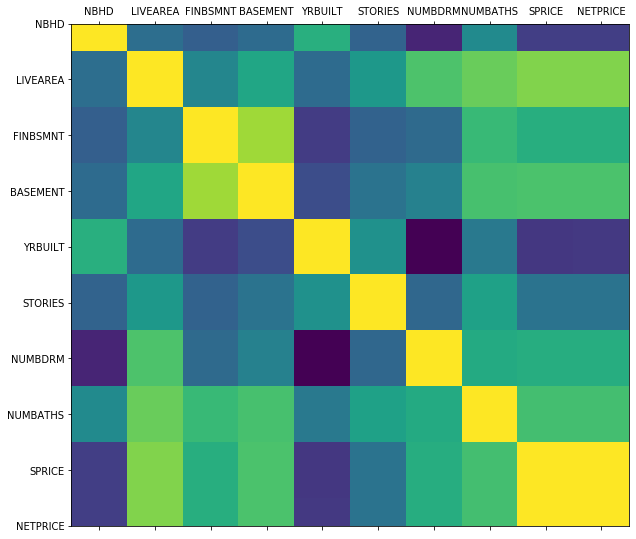

In [40]:
plot_corr(df)

In [30]:
df.corr()

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,YRBUILT,STORIES,NUMBDRM,NUMBATHS,SPRICE,NETPRICE
NBHD,1.000000,0.259890,0.193840,0.245763,0.574130,0.209476,-0.038676,0.396411,0.055834,0.057782
LIVEAREA,0.259890,1.000000,0.375630,0.529143,0.245500,0.458552,0.675781,0.737603,0.779242,0.779815
FINBSMNT,0.193840,0.375630,1.000000,0.833759,0.048126,0.205812,0.244496,0.621753,0.568986,0.568608
BASEMENT,0.245763,0.529143,0.833759,1.000000,0.118636,0.283701,0.351361,0.664827,0.672774,0.672432
YRBUILT,0.574130,0.245500,0.048126,0.118636,1.000000,0.430473,-0.157021,0.310553,0.032686,0.036429
STORIES,0.209476,0.458552,0.205812,0.283701,0.430473,1.000000,0.228432,0.503113,0.283021,0.284466
NUMBDRM,-0.038676,0.675781,0.244496,0.351361,-0.157021,0.228432,1.000000,0.548215,0.565130,0.562708
NUMBATHS,0.396411,0.737603,0.621753,0.664827,0.310553,0.503113,0.548215,1.000000,0.652346,0.652418
SPRICE,0.055834,0.779242,0.568986,0.672774,0.032686,0.283021,0.565130,0.652346,1.000000,0.999892
NETPRICE,0.057782,0.779815,0.568608,0.672432,0.036429,0.284466,0.562708,0.652418,0.999892,1.000000


<font color='green'>had to remove date, type was confusing.. shouldn't really be used anyway

In [41]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['NBHD','LIVEAREA','FINBSMNT','BASEMENT','YRBUILT','STORIES','NUMBDRM','NUMBATHS'  ]
predicted_class_names = ['SPRICE']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [42]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.77% in training set
30.23% in test set


In [43]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
# Naive Bayes  predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7148



In [45]:
# Naive Bayes predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


nb_predict_test [385000 282000  59900 147000 147000 125000 275000  51500  50000 275000
 225000  36777 417000 165000  55000 140000 125000 100000 354685 282000
 195700 302000 275000 147000 225000 350000 275000 125000 115000 275000
 275000 289000 350000 125000 202000 225000 275000  45000 289000 140000
 125000 265000 147000  36777  31000 275000 225000 125000 202000 330000
 282000 211500 330000 330000 202000 202000  86000 299900  32000  45637
 125000 180931  36777 275000 225000  33157 289000 125000  37500  47000
 125000 125000  36777 125000 385000 275000 289000 140000 185500 125000
 202000 385000  29000 147000  70000 225000  95500 275000 320000 202000
 225000 100000 100000 289000  36777 125000 275000 225000 289000 385000
 147000 180000  55000 125000 180500 282000 150500 289000 202000 140000
 275000  36777 125000 147000 275000 275000  55000 282000 202000 385000]
y_test [[352000]
 [521900]
 [101500]
 [146000]
 [118000]
 [210000]
 [205052]
 [ 40000]
 [ 48000]
 [350000]
 [317500]
 [ 30000]
 [41

In [46]:
# Try Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
# Random Forest  predict values using the TRAINING data
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.7617


In [48]:
# Random Forest  predict values using the TEST data
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.0083
